In [24]:
! uv add tensorflow #OR pip install tensorflow
! uv add seaborn #OR !pip install seaborn

Resolved 80 packages in 0.71ms
Audited 74 packages in 0.46ms
Resolved 80 packages in 0.70ms
Audited 74 packages in 0.37ms


# Packages

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
import os


import logging
logging.basicConfig(level=logging.DEBUG)

# Neuron without activation - Regression / Linear Model

## Dataset

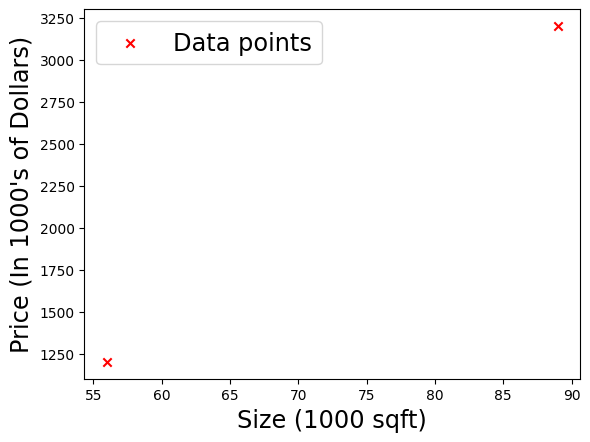

In [26]:
X_train = np.array([[89], [56.0]])
Y_train = np.array([[3200], [1200]])

fig, ax = plt.subplots(1, 1)

ax.scatter(X_train, Y_train, marker='x', c='r', label='Data points')
ax.legend(fontsize='xx-large')

ax.set_ylabel("Price (In 1000's of Dollars)", fontsize='xx-large')
ax.set_xlabel("Size (1000 sqft)", fontsize='xx-large')
plt.show()

## Regression / Linear Model

In [27]:
linear_layer = tf.keras.layers.Dense(units=1, activation='linear')

In [28]:
linear_layer.get_weights()

[]

In [29]:
print(X_train[0])
print(X_train[0].shape)

[89.]
(1,)


In [30]:
print(X_train[0].reshape(1, 1))
X_train[0].reshape(1, 1).shape

[[89.]]


(1, 1)

In [31]:
activation1 = linear_layer(X_train[0].reshape(1, 1))
print(activation1)

tf.Tensor([[79.82894]], shape=(1, 1), dtype=float32)


In [32]:
w, b = linear_layer.get_weights()
print(f"w: {w}, b: {b}")

w: [[0.8969544]], b: [0.]


In [33]:
set_w = np.array([[200]])
set_b = np.array([100])

linear_layer.set_weights([set_w, set_b])
linear_layer.get_weights()

[array([[200.]], dtype=float32), array([100.], dtype=float32)]

In [34]:
tf_prediction = linear_layer(X_train)
print("tf_prediction: \n", activation1)

numpy_linreg_prediction = np.dot(X_train, set_w) + set_b
print("\n\nnumpy_linreg_prediction: \n", numpy_linreg_prediction)


tf_prediction: 
 tf.Tensor([[79.82894]], shape=(1, 1), dtype=float32)


numpy_linreg_prediction: 
 [[17900.]
 [11300.]]


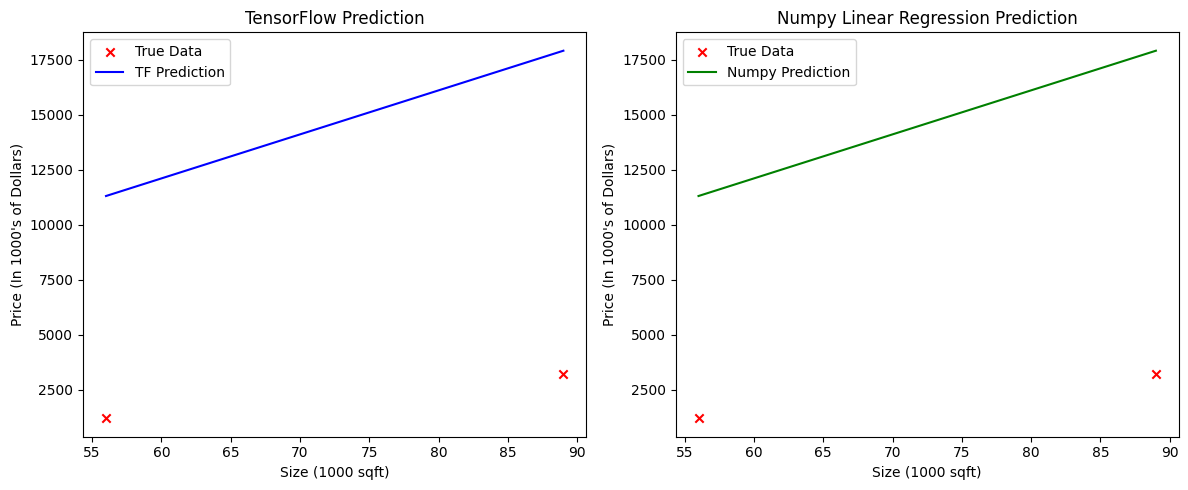

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot tf_prediction
axes[0].scatter(X_train, Y_train, marker='x', c='r', label='True Data')
axes[0].plot(X_train, tf_prediction.numpy(), label='TF Prediction', color='b')
axes[0].set_title('TensorFlow Prediction')
axes[0].set_xlabel("Size (1000 sqft)")
axes[0].set_ylabel("Price (In 1000's of Dollars)")
axes[0].legend()


# Plot numpy_linreg_prediction
axes[1].scatter(X_train, Y_train, marker='x', c='r', label='True Data')
axes[1].plot(X_train, numpy_linreg_prediction, label='Numpy Prediction', color='g')
axes[1].set_title('Numpy Linear Regression Prediction')
axes[1].set_xlabel("Size (1000 sqft)")
axes[1].set_ylabel("Price (In 1000's of Dollars)")
axes[1].legend()

plt.tight_layout()
plt.show()

# Neuron with logistic regression

## Dataset

In [36]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1, 1)
Y_train = np.array([0., 0, 0, 1, 1, 1], dtype=np.float32).reshape(-1, 1)

In [37]:
Y_train == 1

[Y_train == 1]

[array([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])]

In [38]:
Y_train[Y_train == 1]

array([1., 1., 1.], dtype=float32)

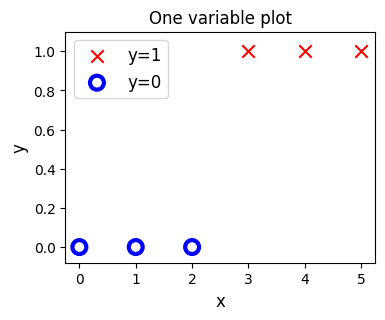

In [39]:
pos = Y_train == 1
neg = Y_train == 0


fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.scatter(X_train[pos], Y_train[pos], marker='x', s=80, c='r', label='y=1')
ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100,label='y=0', facecolors='none', edgecolors='b', lw=3)

ax.set_ylim(-0.08,1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('One variable plot')

ax.legend(fontsize=12)
plt.show()

## Neuron with sigmoid activation

In [40]:
model = Sequential([
    tf.keras.layers.Dense(1, input_dim=1, activation='sigmoid', name='L1')
])

In [41]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [42]:
logistic_layer = model.get_layer('L1')
w, b = logistic_layer.get_weights()
print(w, b)
print(w.shape, b.shape)

[[1.550826]] [0.]
(1, 1) (1,)


In [43]:
set_w = np.array([[2]])
set_b = np.array([-4.5])
logistic_layer.set_weights([set_w, set_b])

In [44]:
logistic_layer.get_weights()

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]

In [45]:
output = model.predict(X_train)
output

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([[0.01098694],
       [0.07585818],
       [0.37754065],
       [0.8175745 ],
       [0.97068775],
       [0.99592984]], dtype=float32)

In [46]:
def np_sigmoid(x):
    return 1 / (1 + np.exp(-x))

np_sigmoid(np.dot(X_train, set_w) + set_b)

array([[0.01098694],
       [0.07585818],
       [0.37754067],
       [0.81757448],
       [0.97068777],
       [0.99592986]])